# Ch3. ML Classifier Using Scikit-learn

Îã§Ïùå ÏàúÏÑúÎ°ú ÏÑ§Ïπò

- `pip3 install numpy`
- `pip3 install scipy`
- `pip3 install scikit-learn`

## 1. Perceptron

### 1.1 iris Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

### 1.2 tran, test Îç∞Ïù¥ÌÑ∞ ÎÇòÎàÑÍ∏∞

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Ï±ÖÏóêÏÑú `from sklearn.cross_validation import train_test_split`Ïù¥Îùº ÎèºÏûàÎäîÎç∞ ÏïûÏúºÎ°ú deprecatedÎê†Í±∞ÎùºÍ≥† ÌïúÎã§. ÏïÑÎûòÏ≤òÎüº `sklearn.model_selection import train_test_split`ÏùÑ Ïç®Ïïº.

Ï¥ù 150Í∞ú Îç∞Ïù¥ÌÑ∞ Ï§ë 3:7 ÎπÑÏú®Î°ú test, train Îç∞Ïù¥ÌÑ∞ ÎÇòÎàî

### 1.3 feature scaling

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Îç∞Ïù¥ÌÑ∞Î•º ÌëúÏ§ÄÌôîÌïòÎäî Í≥ºÏ†ïÏù¥Îã§.

- `sc.fit(X_train)` : train Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î•º Íµ¨ÌïúÎã§.
- `sc.transform(X_train)` : Íµ¨Ìï¥ÏßÑ ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î•º ÌôúÏö©Ìï¥ X_train Îç∞Ïù¥ÌÑ∞Î•º ÌëúÏ§ÄÌôîÌïúÎã§. X_test Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑúÎèÑ ÎßàÏ∞¨Í∞ÄÏßÄ. X_trainÏùÑ ÌôúÏö©Ìï¥ Íµ¨Ìïú ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î•º ÌôúÏö©Ìï¥ÏÑú Îëê Îç∞Ïù¥ÌÑ∞ Î™®ÎëêÎ•º ÌëúÏ§ÄÌôîÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöî. Ï¶â Í∞ôÏùÄ scaling parameterÎ•º ÌôúÏö©Ìï¥Ïïº ÎπÑÍµê Í∞ÄÎä•ÌïòÎã§.

### 1.4 train perceptron

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

- `Perceptron(n_iter=40, eta0=0.1, random_state=0)`
    + epochs(Î∞òÎ≥µ)Îäî 40Î≤à, learning rateÏùÄ 0.1
    + random_stateÏóê seed Í∞í(Ï†ïÏàò)ÏùÑ ÏßÄÏ†ïÌï¥ÏÑú ÎÇòÏ§ëÏóê Îã§Ïãú ÏΩîÎìúÎ•º Ïã§ÌñâÌï¥ÎèÑ Í∞ôÏùÄ Í∞íÏù¥ ÎÇòÏò§ÎèÑÎ°ù Ìï®
- `ppn.fit(X_train_std, y_train)` : train Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ

In [5]:
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: %d" % (y_test != y_pred).sum())

Misclassified samples: 4


- ÌïôÏäµÎêú ppnÏùÑ ÌôúÏö©Ìï¥ÏÑú `X_test_std` Îç∞Ïù¥ÌÑ∞Ïùò ÎãµÏùÑ ÏòàÏ∏°ÌïúÎã§.
- Ïã§Ï†ú ÎãµÏù∏ `y_test`ÏôÄ ÏòàÏ∏°Í∞í `y_pred`Ïùò Í∞íÏùÑ ÎπÑÍµêÌï¥Î≥∏Îã§.
- 45Í∞ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï§ë 41Í∞úÎ•º ÎßûÏ∑ÑÏúºÎãà ÏïΩ 91.1 ÌçºÏÑºÌä∏Ïùò Ï†ïÌôïÎèÑÎã§.

### 1.5 ÏÑ±Îä• metric Ï∏°Ï†ï

In [6]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


- `accuracy_score` Î©îÏÜåÎìúÎ•º ÌôúÏö©Ìï¥ÏÑú ÏâΩÍ≤å ÏÑ±Îä• Ï∏°Ï†ï Í∞ÄÎä•

### 1.6 ÏãúÍ∞ÅÌôî

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

ÏúÑÏóêÏÑú Ï†ïÏùòÌïú Ìï®ÏàòÎ•º ÌôúÏö©Ìï¥ Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌï¥Î≥∏Îã§. ÏïÑÎûò Í∑∏Î¶ºÏóêÏÑúÏ≤òÎüº perceptronÏùÄ ÏÑ†ÌòïÏúºÎ°ú Î∂ÑÎ¶¨Îê† Ïàò ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î≥ÑÎ°ú Ìö®Î†•ÏùÑ Î∞úÌúòÌïòÏßÄ Î™ªÌïúÎã§.

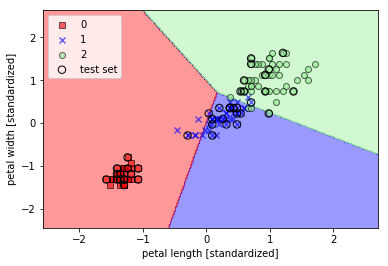

In [8]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## 2. Logistic regression

### 2.1 Sigmoid function

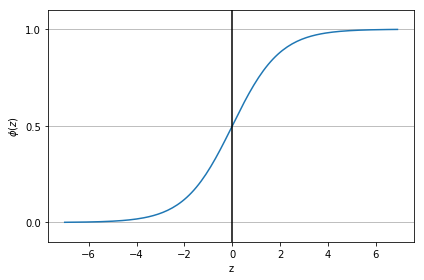

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

- Î≤†Î•¥ÎàÑÏù¥ ÏãúÌñâÏóêÏÑú Ïö∞Î¶¨Í∞Ä Íµ¨ÌïòÍ≥†Ïûê ÌïòÎäî ÏÇ¨Í±¥Ïùò ÌôïÎ•†ÏùÑ `p`Îùº ÌñàÏùÑ Îïå Ïù¥ `p`ÏôÄ Í∑∏Î†áÏßÄ ÏïäÏùÑ ÌôïÎ•† `1-p`Ïùò ÎπÑÏú®ÏùÑ odds ratioÎùºÍ≥† ÌïúÎã§.
- odds ratioÏóê logÎ•º ÏîåÏö∞Î©¥ logit Ìï®ÏàòÍ∞Ä ÎêúÎã§. `logit(p) = log p/(1-p)`
- logit Ìï®ÏàòÏùò Ïó≠ÏàòÍ∞Ä logistic Ìï®ÏàòÏù¥Í≥† sigmoid Ìï®ÏàòÎùºÍ≥†ÎèÑ ÌïúÎã§.
- ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÎäî Í≥ÑÎã®Ìï®ÏàòÍ∞Ä ÏÑ†ÌòïÌôîÎêú Î™®ÏäµÏù¥Îã§. xÏ∂ïÏùò Í∞íÏù¥ 0Ïùº Îïå y Í∞íÏù¥ 0.5Í∞Ä ÎêòÍ≥†, Ïù¥Î•º Í∏∞Ï§ÄÏúºÎ°ú ÏÑ†ÌÉùÌïòÍ≤åÎêúÎã§.
- Ï¶â xÏ∂ï Í∞íÏù¥ 0Î≥¥Îã§ ÌÅ¨Î©¥ A, ÏûëÏúºÎ©¥ B ÏÑ†ÌÉù. Ïù¥Î†áÍ≤å ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÏùò Ï∂úÎ†•Í∞íÏùÑ ÌÜµÌï¥ ÏÑ†ÌÉùÌïòÎäî Î∂ÄÎ∂ÑÏùÑ Quantizer(ÏñëÏûêÌôîÍ∏∞)ÎùºÍ≥† ÌïúÎã§.

### 2.2 Íµ¨ÌòÑ

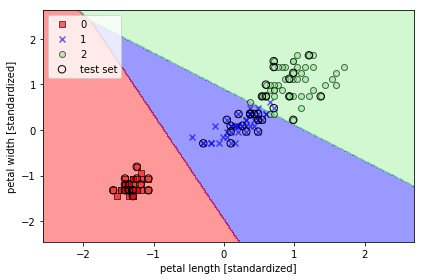

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

- `LogisticRegression` Î©îÏÜåÎìúÎ•º ÌôúÏö©Ìï¥ÏÑú Î™®Îç∏ ÏÉùÏÑ±
- Îß§Í∞úÎ≥ÄÏàò C
    + Î∂ÑÏÇ∞Í≥º biasÏùò Í∑†ÌòïÏ†êÏùÑ Ï∞æÍ∏∞ ÏúÑÌï¥ Ï†ïÍ∑úÌôîÎ•º ÌïòÎäîÎç∞ Í∞ïÎèÑÏùò Ï†ïÎèÑÎ•º ÎÇòÌÉÄÎÇ∏Îã§.
    + logistic regressionÏùò cost functionÏóêÏÑú ÎßàÏßÄÎßâÏóê Ï†ïÍ∑úÌôîÌï≠ÏùÑ ÎçîÌïòÍ≤å ÎêòÎäîÎç∞ `lambda/2 * ||w||^2` Ïù¥ Îïå lambdaÎ•º Ï†ïÍ∑úÌôî parameterÎùºÍ≥† ÌïúÎã§.
    + `C = 1 / lambda` : CÎäî lambdaÏôÄ ÏãùÍ≥º Í∞ôÏùÄ Í¥ÄÍ≥ÑÎ•º Í∞ÄÏßê. CÎ•º Í∞êÏÜåÏãúÌÇ§Î©¥ Ï†ïÍ∑úÌôî Í∞ïÎèÑÎ•º Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏù¥Í≥†, Ï¶ùÍ∞ÄÏãúÌÇ§Î©¥ Ï†ïÍ∑úÌôî Í∞ïÎèÑÎ•º ÎÇÆÏ∂òÎã§.

In [11]:
lr.predict_proba(X_test_std[0, :].reshape(1, -1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

- ÏõêÌïòÎäî row Îç∞Ïù¥ÌÑ∞Î•º ÏÑ†ÌÉùÌï¥ÏÑú Ïñ¥Îäê Ï¢ÖÏóê ÏÜçÌïòÎäîÏßÄ ÌôïÎ•†Î°ú ÎÇòÌÉÄÎÇº Ïàò ÏûàÎã§. ÏïÑÎûò ÏΩîÎìú Í≤∞Í≥ºÏóêÏÑúÎäî 93.7ÌçºÏÑºÌä∏Î°ú 3Î≤àÏß∏ Í∞íÏù¥ ÏÑ†ÌÉùÎêúÎã§.

### 2.3 Ï†ïÍ∑úÌôî, Ïò§Î≤ÑÌîºÌåÖ

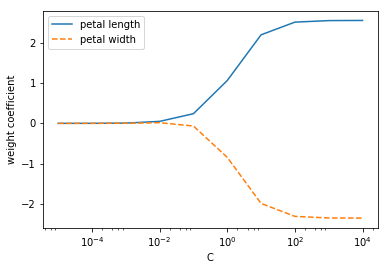

In [12]:
weights, params = [], []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('./figures/regression_path.png', dpi=300)
plt.show()

![regularization](http://www.holehouse.org/mlclass/07_Regularization_files/Image%20[5].png)

- Ï†ïÍ∑úÌôî: parameterÍ∞Ä ÎÑàÎ¨¥ ÏûëÍ±∞ÎÇò ÌÅ∞ Í∞íÏùÑ Í∞ÄÏßÄÎ©¥ ÏûòÎ™ª ÌïôÏäµÏù¥ Îê† Ïàò ÏûàÎã§. Í∑∏ÎûòÏÑú ÏõêÎûòÏùò Î™©ÌëúÌï®ÏàòÏóê Î™®Îì† weightÏùò Ï†úÍ≥±Ïùò Ìï©ÏùÑ ÎçîÌïòÍ±∞ÎÇò(ridge regression), Í∑∏ÎÉ• Ï†àÎåÄÍ∞íÏùÑ ÎçîÌïòÍ±∞ÎÇò(lasso) Ìï¥ÏÑú Ï†ïÍ∑úÌôîÌïúÎã§.
- ÏúÑ ÎèÑÌëúÎäî C Í∞íÏóê Îî∞Îùº coefficient(Í≥ÑÏàò) Í∞íÏù¥ Ïñ¥ÎñªÍ≤å Îã¨ÎùºÏßÄÎäîÏßÄ Î≥¥Ïó¨Ï§ÄÎã§. CÏùò Í∞íÏùÑ ÎäòÎ¶¨Î©¥ Ï†ïÍ∑úÌôî Í∞ïÎèÑ Ï¶ùÍ∞ÄÎ•º ÏùòÎØ∏ÌïúÎã§.

## 3. Support Vector Machine

![Imgur](http://i.imgur.com/mM6w2sP.png)

- SVM ÏïåÍ≥†Î¶¨Ï¶òÏùò Î™©ÌëúÎäî marginÏùÑ ÏµúÎåÄÌôîÌïòÎäî Í≤É
- hyperplane: pÏ∞®ÏõêÏóêÏÑú ÏÑ†ÌòïÌï®Ïàò. Ï¶â pÏ∞®ÏõêÏóêÏÑú Í∞íÎì§ÏùÑ Î∂ÑÎ¶¨ÌïòÎäî Í∏∞Ï§ÄÏù¥ ÎêòÎäî Í≤É. 2Ï∞®ÏõêÏóêÏÑ† ÏßÅÏÑ†Ïù¥Í≥†, 3Ï∞®ÏõêÏóêÏÑ† ÌèâÎ©¥. Ìï¥Îãπ Ìï®ÏàòÎ≥¥Îã§ Í∞íÏù¥ ÌÅ∞ ÏòÅÏó≠ÏùÑ positive hyperplane, ÏûëÏùÄ ÏòÅÏó≠ÏùÑ negative hyperplaneÏù¥Îùº ÌïúÎã§.
- Support vector: hyperplaneÍ≥º Í∞ÄÏû• Í∞ÄÍπåÏö¥ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎì§
- margin: positive hyperplaneÏùò support vectorÏôÄ negative hyperplaneÏùò support vector Í∞ÑÏùò Í±∞Î¶¨
    + marginÏù¥ ÌÅ¨Îã§: ÏùºÎ∞òÌôî Ïò§Ï∞®Í∞Ä ÎÇÆÎã§.
    + marginÏù¥ ÏûëÎã§: overfitting Í≤ΩÌñ•Ïù¥ ÌÅ¨Îã§.
- ÏúÑÏóêÏÑú Ïñ∏Í∏âÌïú `C`Ïùò Í∞íÏùÑ ÌôúÏö©Ìï¥ÏÑú marginÏùò ÎÑàÎπÑÎ•º Ï°∞Ï†ïÌï† Ïàò ÏûàÎã§.

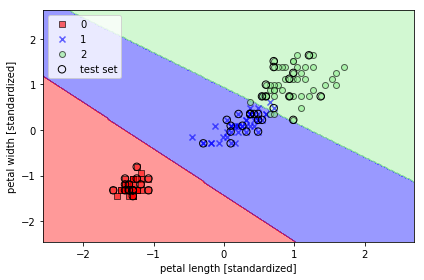

In [14]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_linear.png', dpi=300)
plt.show()

- Îç∞Ïù¥ÌÑ∞Í∞Ä ÍµâÏû•Ìûà ÌÅ¥ ÎïåÎäî Ïª¥Ìì®ÌÑ∞ Î©îÎ™®Î¶¨Ïóê Ïò¨Î†§ÏÑú ÏûëÏóÖÌïòÍ∏∞Í∞Ä Ï†ÅÌï©ÌûàÏßÄ ÏïäÎã§. `SGDClassifier` ÌÅ¥ÎûòÏä§Î•º ÌôúÏö©ÌïòÎ©¥ Ïù¥ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ Í∞ÄÎä•.
    - ÎùºÏù¥Î∏åÎü¨Î¶¨ : `from sklearn.linear_model import SGDClassifier`
    - perceptron : `ppn = SGDClassifier(loss='perceptron')`
    - logistic regression : `lr = SGDClassifier(loss='log')`
    - svm : `svm = SGDClassifier(loss='hinge')`

## 4. Non-linear with kernel SVM

### 4.1 kernelÏóê ÎåÄÌï¥ÏÑú

[Îã§ÌÅ¨ ÌîÑÎ°úÍ∑∏ÎûòÎ®∏ Î∏îÎ°úÍ∑∏](http://darkpgmr.tistory.com/147)Ïóê Í∞ÄÎ©¥ kernelÏóê ÎåÄÌï¥ Îß§Ïö∞ ÏûêÏÑ∏ÌïòÍ≤å ÏÑ§Î™ÖÎêòÏñ¥ÏûàÎã§. Í∞êÏÇ¨Ìï©ÎãàÎã§.

![kernel](https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Kernels.svg/1180px-Kernels.svg.png)

> kernel functionÏùò Ï¢ÖÎ•ò. Ï∂úÏ≤ò: ÏúÑÌÇ§ÌîºÎîîÏïÑ

- kernel function: ÏàòÌïôÏ†ÅÏúºÎ°ú ÏõêÏ†êÏùÑ Ï§ëÏã¨ÏúºÎ°ú ÎåÄÏπ≠Ïù¥Î©¥ÏÑú Ï†ÅÎ∂ÑÍ∞íÏù¥ 1Ïù∏ non-negative Ìï®Ïàò. Í∞ÄÏö∞ÏãúÏïà, Epanechnikov, uniform Ìï®ÏàòÍ∞Ä ÎåÄÌëúÏ†Å
- KDE(Kernel Density Estimation): Î∞ÄÎèÑ Ï∂îÏ†ï Î∞©Ïãù Ï§ë non-parametric Î∞©ÏãùÏùò ÌïòÎÇòÎã§. Í∏∞Ï°¥ non-parametric Î∞©Ïãù Ï§ë ÌïòÎÇòÏù∏ ÌûàÏä§ÌÜ†Í∑∏Îû®Ïù¥ Í≤ΩÍ≥ÑÏóêÏÑú Î∂àÏó∞ÏÜçÏ†ÅÏù¥Í∏∞ ÎïåÎ¨∏Ïóê kernel functionÏùÑ Ïù¥Ïö©ÌïòÏó¨ smoothening Ìïú Í≤É.
- Ïñ¥ÎñªÍ≤å smoothening Ìï† Í≤ÉÏù∏Í∞Ä

    ![Imgur](http://i.imgur.com/6yLXt2e.png)

    + ÏúÑ PDF(Probability Density Function)ÏóêÏÑú xÎäî random variable, xiÎäî Í¥ÄÏ∏°Îêú ÏÉòÌîå Îç∞Ïù¥ÌÑ∞, KÎäî Ïª§ÎÑêÏù¥Îã§. hÎäî Ïª§ÎÑêÏù¥ Îæ∞Ï°±Ìïú ÌòïÌÉú(ÏûëÏùÄ Í∞í)Ïù∏ÏßÄ ÏôÑÎßåÌïú(ÌÅ∞ Í∞í) ÌòïÌÉúÏù∏ÏßÄÎ•º ÎÇòÌÉÄÎÇ∏Îã§.
    + Í¥ÄÏ∏°Îêú Îç∞Ïù¥ÌÑ∞ Í∞ÅÍ∞ÅÏùÑ Ï§ëÏã¨ÏúºÎ°ú ÌïòÎäî Ïª§ÎÑê Ìï®ÏàòÎ•º ÏÉùÏÑ±ÌïúÎã§. `K(x-xi)`
    + ÎßåÎì§Ïñ¥ÏßÑ Î™®Îì† Ìï®ÏàòÎ•º ÎçîÌï¥ÏÑú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÎ°ú ÎÇòÎààÎã§.

![kernel-func](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Comparison_of_1D_histogram_and_KDE.png/1000px-Comparison_of_1D_histogram_and_KDE.png)

- h Í∞íÏóê Îî∞Îùº smoothing Ï†ïÎèÑÍ∞Ä Îã¨ÎùºÏßÑÎã§. ÌöåÏÉâ(true density: standard normal), Îπ®Í∞ï, Í≤ÄÏ†ï, ÎÖπÏÉâ ÏàúÏúºÎ°ú h Í∞íÏùÄ 0.05, 0.337, 2Îã§. ÎÜíÏïÑÏßàÏàòÎ°ù ÏôÑÎßåÌï¥Ïßê.

![kde-h](https://upload.wikimedia.org/wikipedia/en/thumb/e/e5/Comparison_of_1D_bandwidth_selectors.png/440px-Comparison_of_1D_bandwidth_selectors.png)

- KDEÎ•º ÌôúÏö©Ìï† Îïå Í∞ÄÏû• Ï§ëÏöîÌïú Í≤ÉÏùÄ Ïñ¥Îñ§ Ïª§ÎÑê Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï†ÏßÄÏôÄ hÍ∞íÏùÑ Ïñ¥ÎñªÍ≤å ÏÑ§Ï†ïÌï†ÏßÄÎùºÍ≥† ÌïúÎã§.
    + ÏµúÏ†ÅÏùÄ Epanechnikov Ïª§ÎÑê Ìï®Ïàò
    + Í∞ÄÏö∞ÏãúÏïàÎèÑ ÎßéÏù¥ ÏÇ¨Ïö©ÌïòÎäîÎç∞ Ïù¥ Îïå h Í∞íÏùÄ `h = ((4 * ùõî^5) / 3n)^(1/5) = (1.06 * ùõîn)^(-1/5)`

    ![h value](https://wikimedia.org/api/rest_v1/media/math/render/svg/9ec402653306a6af7383bc50062be20d557508b2)

### 5.2 XOR Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞

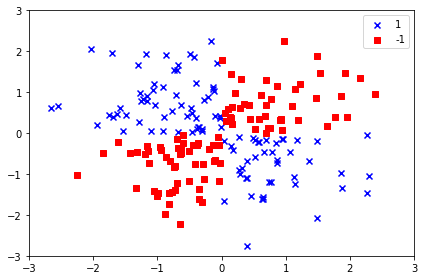

In [15]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1],
            c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

- `X_xor = np.random.randn(200, 2)` : 200 by 2 Îß§Ìä∏Î¶≠Ïä§Î•º ÎßåÎìúÎäîÎç∞ Í∞íÏùÑ 0Í≥º 1 ÏÇ¨Ïù¥Ïùò ÎÇúÏàòÎ°ú ÌïúÎã§.
- `X_xor[:, 0] > 0`, `X_xor[:, 1] > 0` : Í∞ÅÍ∞Å X_xorÏùò 0Î≤à Ïª¨Îüº, 1Î≤à Ïª¨ÎüºÏù¥ 0Î≥¥Îã§ Ïù¥ÏÉÅÏù¥Î©¥ True, ÏïÑÎãàÎ©¥ FalseÎ°ú Í∞íÏùÑ ÏÑ§Ï†ïÌï¥ÏÑú ÏÉàÎ°úÏö¥ np.arrayÎ•º Î¶¨ÌÑ¥ÌïúÎã§.
- `y_xor = np.logical_xor(data1, data2)` : xor Ïó∞ÏÇ∞ÏùÑ ÌñâÌïú Í≤∞Í≥ºÎ•º Î¶¨ÌÑ¥ÌïúÎã§. data1, 2Îäî Í∞ôÏùÄ ÌÅ¨Í∏∞Ïó¨ÏïºÌï®. Ï¶â y_xorÏùò Í∞íÏùÄ X_xor Îç∞Ïù¥ÌÑ∞Ïùò Í∞Å Ìñâ(x,y Ï¢åÌëú)Ïù¥ TrueÏù∏ÏßÄ FalseÏù∏ÏßÄ Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎã§.
- `plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1])` : y_xorÏùò Í∞íÏù¥ 1Ïù∏ ÏßÄÏ†ê, Ï¶â xorÏó∞ÏÇ∞Ïù¥ TrueÏù∏ Ï¢åÌëúÎ•º Í≥®ÎùºÏÑú Ï†êÏùÑ Ï∞çÎäîÎã§.

### 5.3 Í≥†Ï∞®Ïõê Í≥µÍ∞ÑÏóêÏÑú hyperplane Ï∞æÍ∏∞

- train Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÌïòÍ∏∞
    + ÏÑ†ÌòïÏúºÎ°ú Î∂ÑÎ¶¨Ìï† Ïàò ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Îäî Í∏∞Ï°¥Ïóê Í∞ÄÏßÄÍ≥† ÏûàÎçò featureÎì§ÏùÑ Ï°∞Ìï©Ìï¥ÏÑú ÏÉàÎ°úÏö¥ ÎπÑÏÑ†Ìòï featureÎ•º ÎßåÎì§Ïñ¥ÎÇ∏Îã§.
    + `mapping function œï(x1, x2) = (z1, z2, z3) = (x1, x2, x1^2 + x2^2)` : Ïù¥Î†áÍ≤å Í≥†Ï∞®ÏõêÏúºÎ°ú Î∞îÍæ∏Î©¥ Ïã†Í∏∞ÌïòÍ≤åÎèÑ 3Ï∞®ÏõêÏóêÏÑú hyperplaneÏù¥ Ï†ïÌôïÌïòÍ≤å Ï§ëÍ∞Ñ Ï¢åÌëúÎì§Îßå 'ÎÜíÏù¥'Í∞íÏùÑ ÌôúÏö©Ìï¥ÏÑú ÏÑ†ÌòïÏúºÎ°ú Íµ¨Î∂ÑÌï† Ïàò ÏûàÎã§.
    + Í≥†Ï∞®ÏõêÏóêÏÑúÏùò ÏÑ†Ìòï SVM Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÏºúÎëîÎã§.
- test Îç∞Ïù¥ÌÑ∞ Í≤ÄÏ¶ùÌïòÍ∏∞
    + test Îç∞Ïù¥ÌÑ∞Î•º train Îç∞Ïù¥ÌÑ∞Ï≤òÎüº Í∞ôÏùÄ Î∞©ÏãùÏúºÎ°ú Í≥†Ï∞®ÏõêÏúºÎ°ú Ìà¨ÏòÅÌïú ÌõÑ Í∏∞Ï°¥ Î™®Îç∏ÏùÑ ÌôúÏö©Ìï¥ Î∂ÑÎ•òÌïúÎã§.
    + Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïãú 2Ï∞®ÏõêÏúºÎ°ú ÎêòÎèåÎ†§ÏÑú ÌôúÏö©

### 5.4 kernel trick

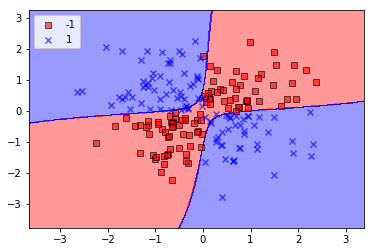

In [16]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc="upper left")
plt.show()

- ÏúÑ 5.3Ïùò Í≥†Ï∞®Ïõê Ìà¨ÏòÅ Î∞©ÏãùÏùÄ Í≥ÑÏÇ∞ÎüâÏù¥ Îß§Ïö∞ ÌÅ¨Í≤å ÎäòÏñ¥ÎÇúÎã§Îäî Î¨∏Ï†úÍ∞Ä ÏûàÎã§.
- Í∑∏ÎûòÏÑú Í∏∞Ï°¥ `(xi)T * xj`Í∞Ä Í≥†Ï∞®ÏõêÏúºÎ°ú Ìà¨ÏòÅÎèº `œï((xi)T) * œï(xj)`Î°ú ÎåÄÏ≤¥ÎêòÎäî Í≥ºÏ†ï ÎåÄÏã† kernel function KÎ•º ÌôúÏö©ÌïúÎã§.
- Ïù¥Î•º kernel trickÏù¥Îùº ÌïòÍ≥† Í∞ÄÏû• ÏûêÏ£º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ RBF kernel(Radial Basis Function kernel)Í≥º Gaussian kernelÏù¥Îã§.
    + ![rbf-kernel](https://wikimedia.org/api/rest_v1/media/math/render/svg/c16fd6c515412f96a57506103896178d0e8af77d)
    + ÏúÑ Í≥µÏãùÏùÄ RBF kernelÏù¥Í≥† Î∂ÑÎ™®Î•º gammaÎ°ú ÏπòÌôòÌï¥ÏÑú Í∞ÑÏÜåÌôîÌïòÍ∏∞ÎèÑ ÌïúÎã§. Ïù¥ gamma Í∞íÏùÑ Ï°∞Ï†ïÌï¥Í∞ÄÎ©¥ÏÑú ÏµúÏ†ÅÌôîÌï¥ÏïºÌïúÎã§.
- RBFÎ•º ÌôúÏö©ÌïòÎäî ÏúÑ ÏΩîÎìúÎäî XORÏùÑ Ï†ïÌôïÌïòÍ≤å Î∂ÑÎ¶¨Ìï¥ÎÇ∏Îã§.

### 5.5 irisÏóê kernel trick Ï†ÅÏö©

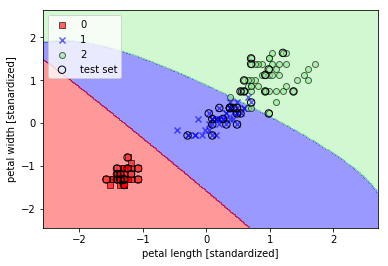

In [17]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [stanardized]')
plt.legend(loc='upper left')
plt.show()

- gamma Í∞íÏù¥ ÌÅ¨Î©¥ Í≤ΩÍ≥ÑÍ∞Ä Î∂ÄÎìúÎü¨ÏõåÏßÄÍ≥†, ÏûëÏúºÎ©¥ Í≤ΩÍ≥ÑÍ∞Ä ÌÉÄÏù¥Ìä∏Ìï¥ÏßÑÎã§.
- ÎÑàÎ¨¥ Í∞íÏùÑ ÏûëÍ≤åÌï¥ÏÑú Í≤ΩÍ≥ÑÎ•º ÌÉÄÏù¥Ìä∏ÌïòÍ≤å ÌïòÎ©¥ overfitting Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌï† Ïàò ÏûàÎã§.

## 6. Decision tree

### 6.1 Í∏∞Î≥∏

![decision-tree](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/CART_tree_titanic_survivors_KOR.png/700px-CART_tree_titanic_survivors_KOR.png)

- ÏúÑ Ïù¥ÎØ∏ÏßÄÏ≤òÎüº ÏùºÎ†®Ïùò "ÏßàÎ¨∏"Îì§ÏùÑ Í±∞Ï≥êÏÑú Îç∞Ïù¥ÌÑ∞Î•º Ï™ºÍ∞úÍ∞ÄÎäî Í≥ºÏ†ïÏù¥Îã§. Îã§Î•∏ Î∂ÑÏÑùÎì§Ïóê ÎπÑÌï¥ ÏßÅÍ¥ÄÏ†ÅÏù¥Í≥† Ïù¥Ìï¥ÌïòÍ∏∞ ÏâΩÎã§. Îâ¥Îü¥ÎÑ∑ÏùÄ hidden layerÍ∞Ä ÏûàÎäî Î∂ÑÏÑùÍ∞ÄÍ∞Ä ÏïåÍ∏∞ Ïñ¥Î†§Ïö¥ Î∏îÎûôÎ∞ïÏä§ Î™®Îç∏Ïù¥ÏßÄÎßå decision treeÎäî ÌôîÏù¥Ìä∏Î∞ïÏä§ Î™®Îç∏Ïù¥Îã§.
- Í≥ÑÏÇ∞ ÎπÑÏö©Ïù¥ ÎÇÆÏïÑÏÑú ÎåÄÎüâÏùò Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎèÑ Îπ†Î•¥Í≤å Ïó∞ÏÇ∞ Í∞ÄÎä•
- Í∞ÄÏû• ÌÅ∞ IG(Information Gain) Í∞íÏùÑ ÎèÑÏ∂úÌïòÎäî featureÎ•º Ï∞æÍ≥† Ïù¥Î•º ÌÜµÌï¥ ÎÖ∏ÎìúÎ•º Î∂ÑÎ•òÌïúÎã§.
- Ìä∏Î¶¨Í∞Ä ÎÑàÎ¨¥ ÍπäÏñ¥ÏßÄÎ©¥ overfitting Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌïòÎØÄÎ°ú ÏµúÎåÄ ÍπäÏù¥ Ï†úÌïúÏùÑ ÎëîÎã§.
- Ï¢ÖÎ•ò
    + regression tree : Ï∂úÎ†•Ïù¥ Ïó∞ÏÜçÌòï(Ïà´Ïûê)
    + classification tree : Ï∂úÎ†•Ïù¥ Î≤îÏ£ºÌòï
    
### 6.2 gini, entropy Íµ¨ÌòÑ

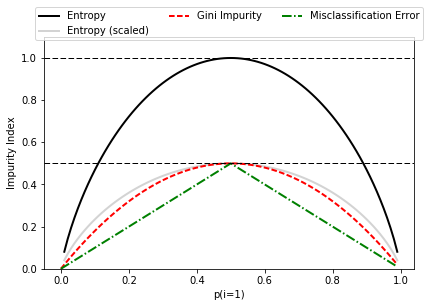

In [18]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
#plt.savefig('./figures/impurity.png', dpi=300, bbox_inches='tight')
plt.show()

### 6.3 Decision tree Íµ¨ÌòÑ

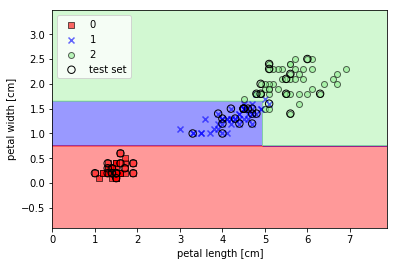

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

### 6.4 Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ°ú ÎèÑÌëú Î≥ÄÌôò

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", feature_names=['petal length', 'petal width'])

- [graphviz](http://graphviz.org/)ÏóêÏÑú Îã§Ïö¥Î∞õÍ≥† ÏÑ§Ïπò
- `dot -Tpng tree.dot -o tree.png` : ÏôºÏ™Ω Î™ÖÎ†πÏúºÎ°ú ÏúÑ ÏΩîÎìúÏóêÏÑú ÎßåÎì† dot ÌååÏùºÏùÑ Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÌôò

## 7. Random forests

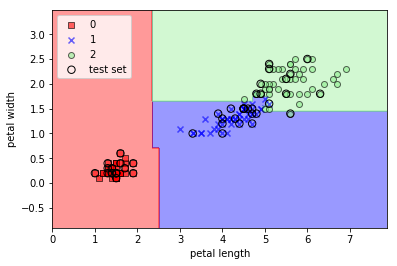

In [21]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

## 8. KNN(K-nearest neighbor)

### 8.1 Í∏∞Î≥∏

- lazy leraner: KNNÏùÄ lazy learner Î•òÏùò Î∞©ÏãùÏù¥Îã§. train Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©Ìï¥ÏÑú Ìï®ÏàòÎ•º ÌïôÏäµÌïòÎäîÍ≤å ÏïÑÎãàÎùº Îç∞Ïù¥ÌÑ∞Î•º Í∏∞ÏñµÌïòÍ∏∞ ÎïåÎ¨∏
- parametric model
    + ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ•òÌïòÎäî Ïö∞Î¶¨Ïùò Î™®Îç∏, Ï¶â Ìï®ÏàòÎ•º ÌïôÏäµÌïòÍ∏∞ ÏúÑÌï¥ train Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú parameterÎ•º Ï∂îÏ†ïÌïúÎã§. ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ train Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÎçîÏù¥ÏÉÅ ÌïÑÏöîÏóÜÎã§.
    + ÏÇ¨Î°Ä: Perceptron, Logistic regression, linear SVM
- nonparametric model
    + parameterÍ∞Ä Îî± Ï†ïÌï¥ÏßÑ Í≤ÉÏù¥ ÏïÑÎãàÎùº train Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Ìï®Íªò Í∞úÏàòÍ∞Ä Ï¶ùÍ∞ÄÌïúÎã§. parametric modelÏóê ÎπÑÌï¥ Í≥ÑÏÇ∞ ÎπÑÏö©Ïù¥ ÎÜíÎã§.
    + ÏÇ¨Î°Ä: decision tree classifier, random forest, kernel SVM, KNN
- KNNÏùÄ nonparametric modelÏùò ÌïòÎÇòÏù¥Í≥†, instance-based learningÏù¥Îã§. instance-based learningÏùÄ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ "Í∏∞Ïñµ"ÌïòÎäî Í≤ÉÏù¥ ÌäπÏßïÏù¥Îã§.
- lazy learningÏùÄ instance-based learning Ï§ëÏóêÏÑúÎèÑ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú costÍ∞Ä ÏóÜÎäî ÌäπÎ≥ÑÌïú ÏºÄÏù¥Ïä§Îã§. "ÌïôÏäµ"Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÏñ¥ÏÑú ÌïôÏäµÏóê ÎåÄÌïú costÎäî ÏóÜÎäîÍ±∞ÏßÄÎßå ÎßâÏÉÅ Î∂ÑÎ•òÌï† ÎïåÎäî Îã§Î•∏ Î∞©ÏãùÏóê ÎπÑÌï¥ costÍ∞Ä ÎÜíÎã§. ÏÉòÌîå Ïà´ÏûêÍ∞Ä Ïª§ÏßÄÎ©¥ ÎçîÎçîÏö± Î∂ÑÎ•ò costÍ∞Ä Ïª§ÏßÑÎã§.

### 8.2 Î∂ÑÎ•ò Î∞©Ïãù

- kÏóê Ìï¥ÎãπÌïòÎäî Ïà´ÏûêÏôÄ Í±∞Î¶¨ Î©îÌä∏Î¶≠ ÏÑ†ÌÉù. kÍ∞íÏóê Îî∞Îùº overfitting, underfittingÏù¥ Îã¨ÎùºÏßÑÎã§.
- Î∂ÑÎ•òÌïòÍ≥†Ïûê ÌïòÎäî ÏÉòÌîåÏóê ÎåÄÌïú kÍ∞úÏùò Í∑ºÏ†ëÌïú Ïù¥ÏõÉ Ï∞æÍ∏∞
- Îã§ÏàòÍ≤∞ Ìà¨Ìëú Î∞©ÏãùÏúºÎ°ú Î∂ÑÎ•ò Î†àÏù¥Î∏î Ìï†ÎãπÌïúÎã§. ÏòàÎ•º Îì§Ïñ¥ kÍ∞Ä 5ÎùºÎ©¥ Í∑ºÏ†ë Ïù¥ÏõÉÏùÑ 5Í∞ú ÎΩëÏïÑÏÑú Í∑∏ Ï§ë Í∞ÄÏû• ÎßéÏùÄ ÌòïÌÉúÏùò Î†àÏù¥Î∏îÏùÑ Ìï†ÎãπÌïòÎäî Í≤É.

### 8.3 Íµ¨ÌòÑ

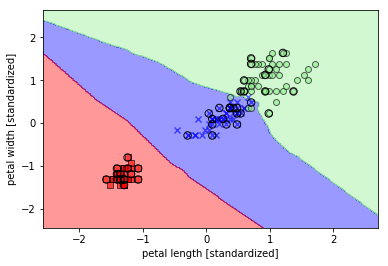

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()

- `knn = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")`
    + `n_neighbors` : Î™á Í∞úÏùò Ïù¥ÏõÉÏùÑ ÏÑ†ÌÉùÌï†Í±¥ÏßÄ. kÏóê Ìï¥Îãπ
    + `p` : 1Ïù¥Î©¥ Îß®Ìï¥Ìäº Í±∞Î¶¨, 2Î©¥ Ïú†ÌÅ¥Î¶¨ÎîîÏïà Í±∞Î¶¨
    + `metric` : Í±∞Î¶¨ Î©îÌä∏Î¶≠ ÏÑ†ÌÉù